## 01Demo: Yeast Segmentation

In [15]:
import sys
import os
sys.path.append("../deeplab/")

import yaml
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

from config_yml import ExperimentOptions
from trainer.train import DeepCellModule
from postprocess.post_process_utils import post_process_panoptic

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 01. Config

In [16]:
mode = 'test' #train, evl, test
model_dir = "../../data/checkpoint/"
config_path = "../deeplab/configs/config_wl.yaml"
num_gpus = 0

### 02. Load Model

In [17]:
with open(config_path, 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
configs = ExperimentOptions(config)
configs.model_options.backbone.drop_path_keep_prob=1

cellmodel = DeepCellModule(mode, configs, num_gpus, model_dir=model_dir)

../../data/checkpoint/
restoring or initializing model...
restored model from ../../data/checkpoint/ckpt-100000.
restored from checkpoint: ../../data/checkpoint/ckpt-100000


### 03. Read Image

Test your picture here

In [19]:
file_path = "../../data/image/3306_REF_DIC_01_00.png"
img = imread(file_path)

### 04. Prediction

In [21]:
%%time
output = cellmodel.predict(img[:,:])

CPU times: user 3min 48s, sys: 4.81 s, total: 3min 52s
Wall time: 45.2 s


### 05. Plot result

In [22]:
post_ouput = output["panoptic_pred"][0].numpy()
post_ouput = post_process_panoptic(post_ouput)

In [37]:
imsave(os.path.join("../../../output/sj", os.path.basename(file_path)), post_ouput)

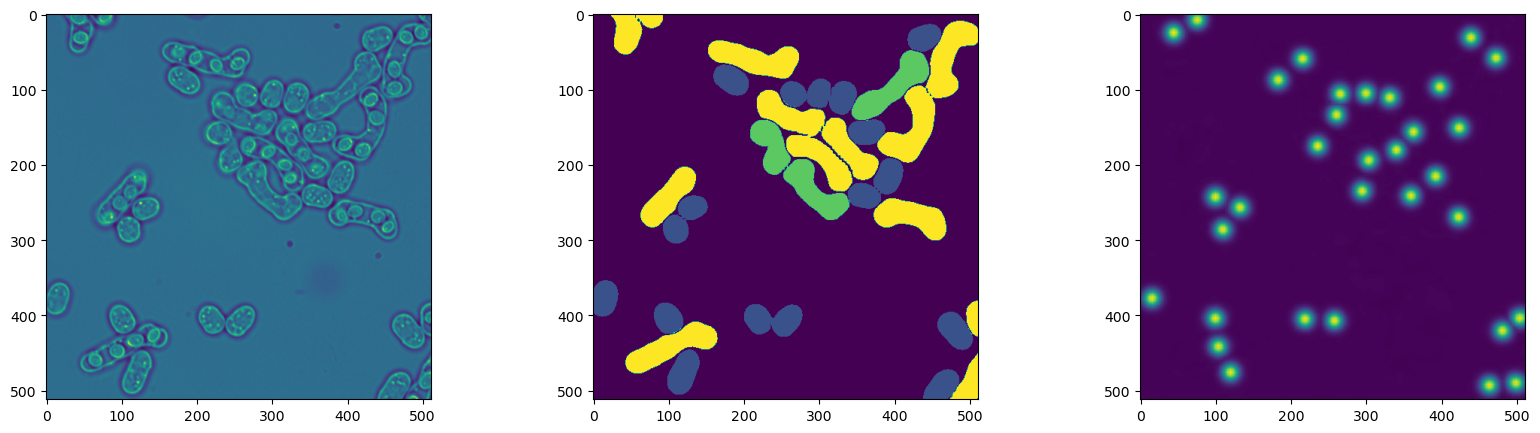

In [24]:
figs, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].imshow(img[:,:])
axs[1].imshow(output['panoptic_pred'][0])
axs[2].imshow(output['center_heatmap'][0])
# axs[3].imshow(post_ouput)